In [2]:
import pandas as pd
from rdkit import Chem
from tqdm.auto import tqdm
from rdkit.Chem.Draw import MolsToGridImage
import seaborn as sns
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [3]:
trainData = pd.read_csv("lipTrainDescriptors.csv")
trainData = trainData.loc[:, ['MolWt', 'MolLogP', 'NumRotatableBonds', 'NumHAcceptors', 'NumHDonors']]
trainTarget = pd.read_csv("lipTrainTarget.csv")

In [4]:
testData = pd.read_csv("lipTestDescriptors.csv")
testData = testData.loc[:, ['MolWt', 'MolLogP', 'NumRotatableBonds', 'NumHAcceptors', 'NumHDonors']]
testTarget = pd.read_csv("lipTestTarget.csv")

In [5]:
from sklearn.preprocessing import StandardScaler

frames = [trainData, testData]
allData = pd.concat(frames, ignore_index=True)

frames2 = [trainTarget, testTarget]
allTarget = pd.concat(frames2, ignore_index=True)

allDataVals = StandardScaler().fit_transform(allData.values)
allTargetVals = allTarget.values

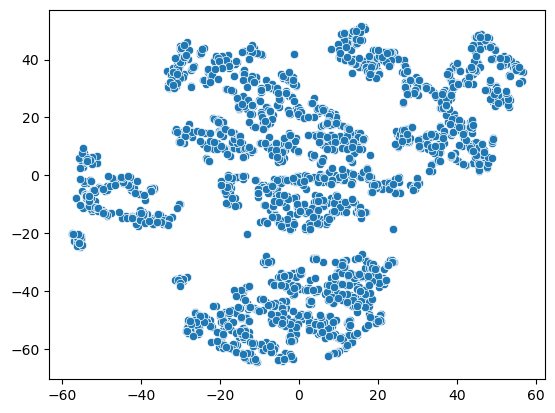

In [6]:
tsne = TSNE()
tsne_crds = tsne.fit_transform(allDataVals)
ax = sns.scatterplot(x=tsne_crds[:,0],y=tsne_crds[:,1])

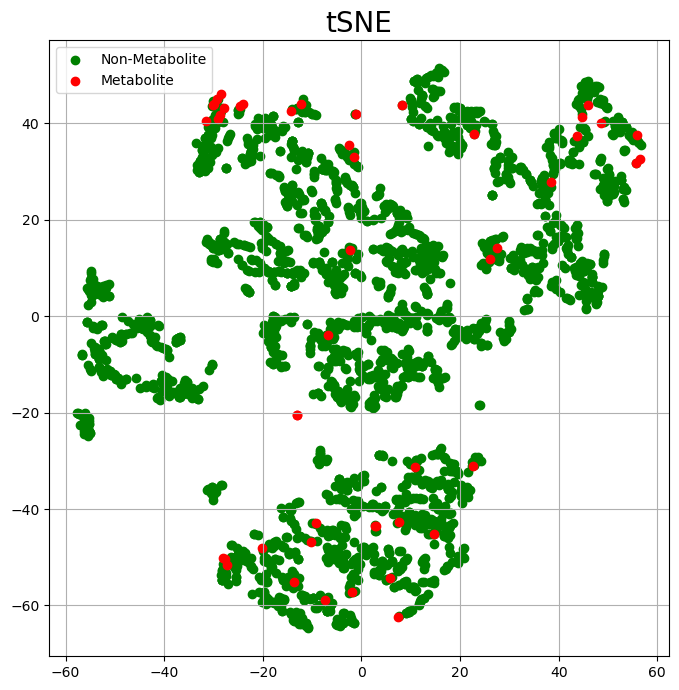

In [9]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_title('tSNE', fontsize = 20)
for i in range(0, len(trainData)):
    if i == 0:
        ax.scatter(tsne_crds[:,0][i], tsne_crds[:,1][i], c = 'g', label = "Non-Metabolite")
    else:
        ax.scatter(tsne_crds[:,0][i], tsne_crds[:,1][i], c = 'g')
for i in range(len(trainData) - 1, len(allData)):
    if i == len(trainData) - 1:
        ax.scatter(tsne_crds[:,0][i], tsne_crds[:,1][i], c = 'r', label = "Metabolite")
    else:
        ax.scatter(tsne_crds[:,0][i], tsne_crds[:,1][i], c = 'r')
plt.legend()
ax.grid()